**In the following, I report the analysis I made of the famous Titanic Dataset. The idea is to understand if there is a way to predict the probability for a passenger to survive or die on the basis of its personal data and status.

Data features leged:

survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

## Libraries import

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data import

**Training dataset** 

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Test dataset**

In [5]:
test = pd.read_csv('titanic_test.csv')

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Visual exploration of data

 **Missing data**

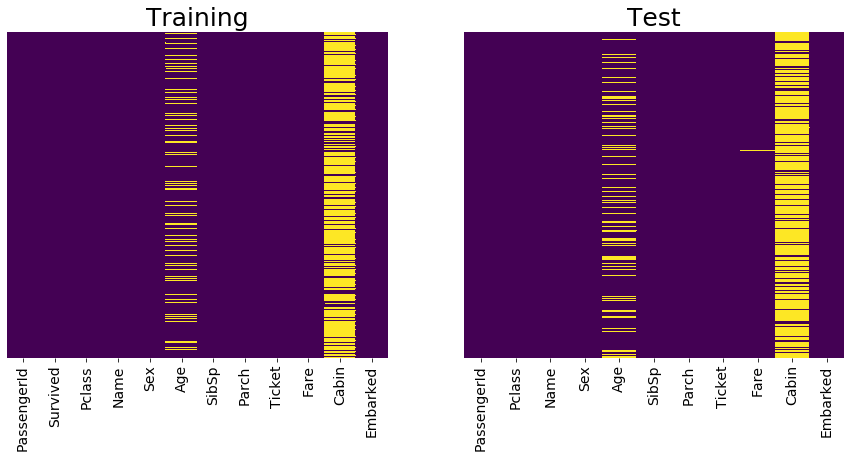

In [7]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# ax1.set_title('Train',fontdict=dict(fontsize=20))
# ax2.set_title('Test',fontdict=dict(fontsize=20))

ax1.axes.set_title('Training',fontsize=25)
#ax1.set_xlabel('X Label',fontsize=25)
ax1.tick_params(labelsize=14)

ax2.axes.set_title('Test',fontsize=25)
ax2.tick_params(labelsize=14)

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax1)
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax2)

Yellow color shows up null values. Here we note that both test and train datasets present some **specific** columns with null values to be fixed. This step will be shown and further discussed later on.

In [8]:
sns.set_style('whitegrid')

**In the following only the train dataset will be visually explored since "Survived" target column data is not provided with the test dataset. Moreover, the two datasets are obtainde from the same original dataset with a random selection and are statistically equivalent.** 

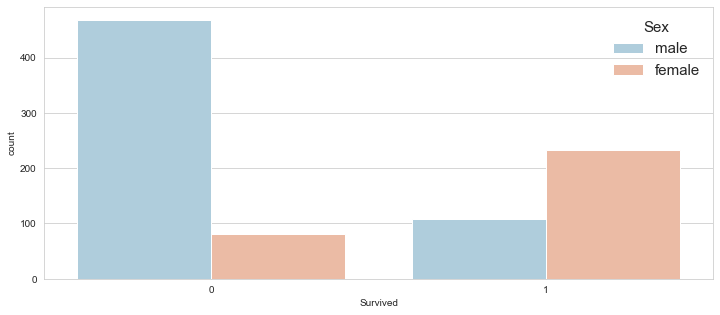

In [9]:
plt.figure(figsize=(12,5))
g = sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')
g.legend(title='Sex',title_fontsize=15,fontsize=15,frameon=False,loc='best')

It is evident that survivors (Survived = 1) gendre is unbalanced. Apparently being a female provideed higher propability to survive.

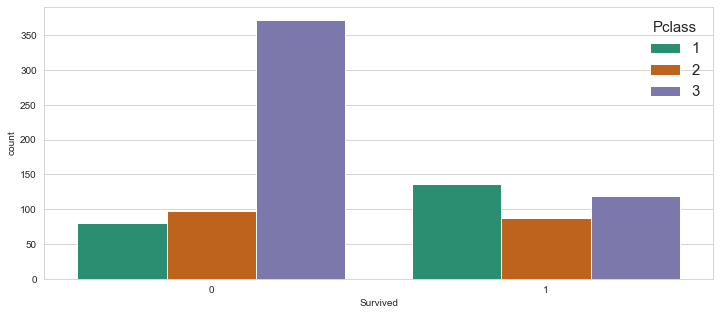

In [202]:
plt.figure(figsize=(12,5))
g = sns.countplot(x='Survived',data=train,hue='Pclass',palette='Dark2')
g.legend(title='Pclass',title_fontsize=15,fontsize=15,frameon=False,loc='best')


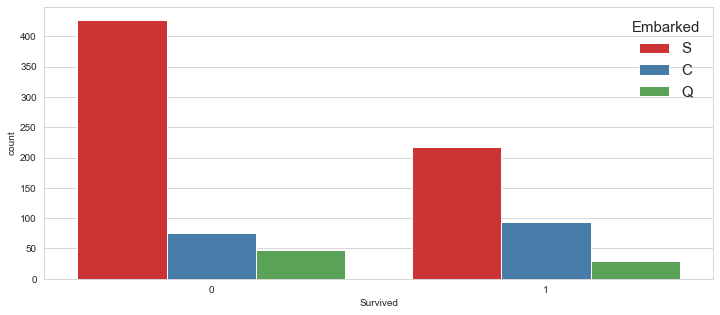

In [201]:
plt.figure(figsize=(12,5))
g = sns.countplot(x='Survived',data=train,hue='Embarked',palette='Set1')
g.legend(title='Embarked',title_fontsize=15,fontsize=15,frameon=False,loc='best')

From similar counr plots of Passengers Class and Embarked, we see that a correlation seems to be present.

**As a check of statistically equivalentce of the train and test dataset, here are reported the Ages distributions of passengers for the two.**

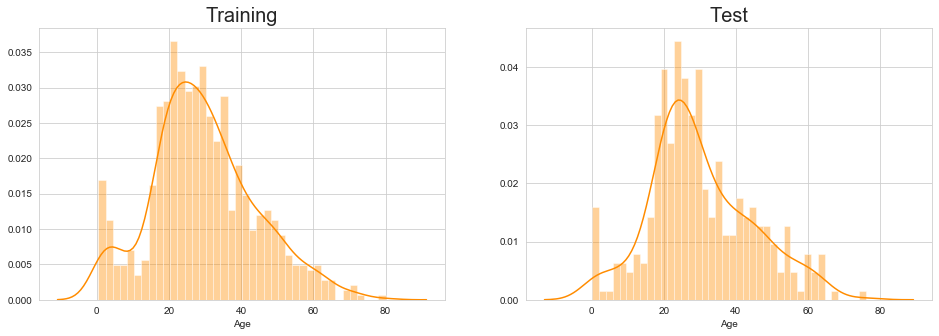

In [215]:
f = plt.figure(figsize=(16,5))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.set_title('Training',fontsize=20)
ax2.set_title('Test',fontsize=20)

sns.distplot(train['Age'].dropna(),kde=True,bins=40,color='darkorange', ax=ax1)
sns.distplot(test['Age'].dropna(),kde=True,bins=40,color='darkorange', ax=ax2)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


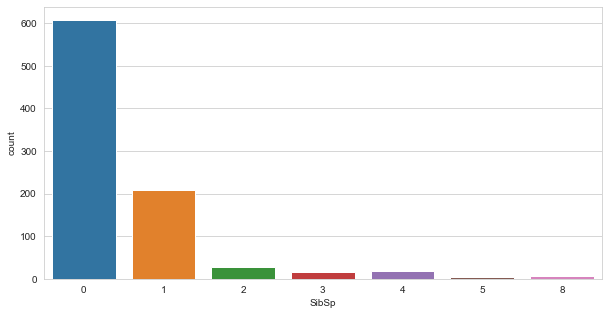

In [196]:
plt.figure(figsize=(10,5))
sns.countplot(x='SibSp',data=train)

Here we explore how many siblings each passenger had. We can seee that the majority of people were alone or in couple. 

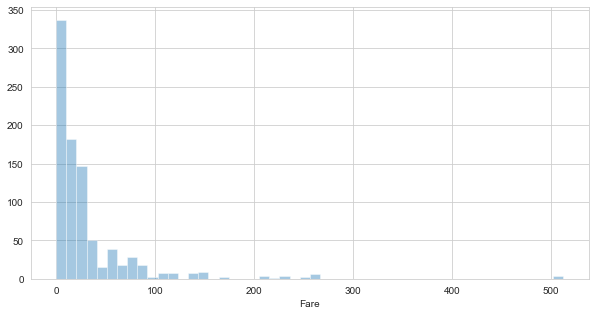

In [197]:
plt.figure(figsize=(10,5))
sns.distplot(train['Fare'],kde=False,bins=50)

Distribution of passenger fares.

##  Data Cleaning

**First step: Missing values**

Let's start with the **training** dataset cleaning

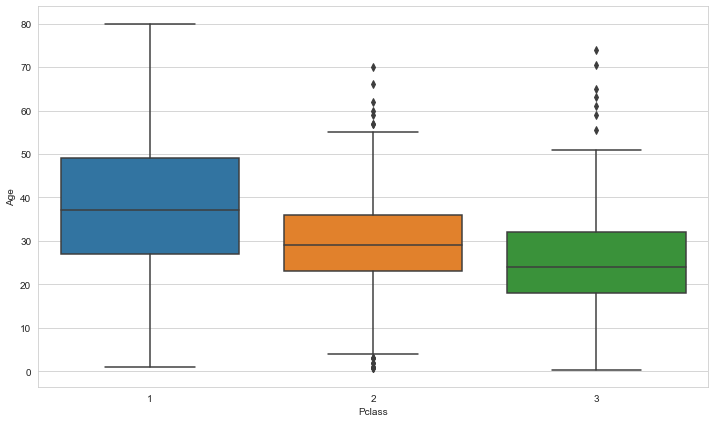

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [13]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

**Here how the age boxplot looks like after missing value removal**

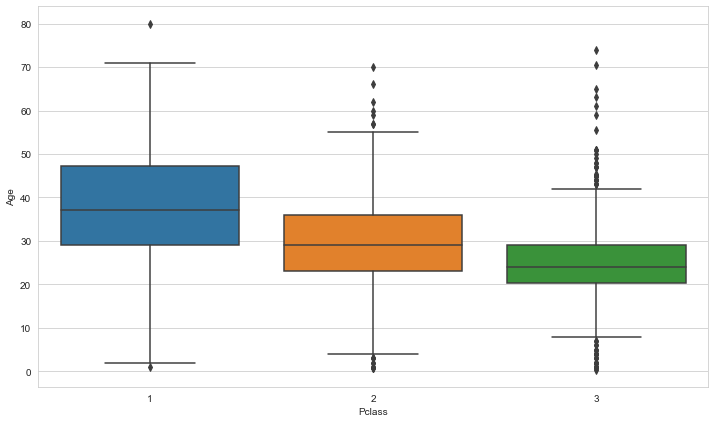

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

**Let's now manage the most important lack of data: let's go back to the colormapvisualization.**

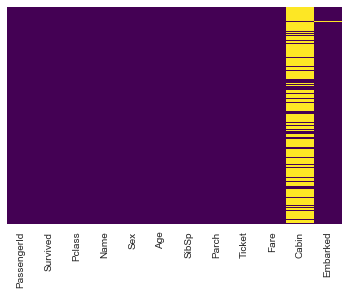

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,
            cbar=False,cmap='viridis')

In [16]:
train.drop('Cabin',axis=1,inplace=True)

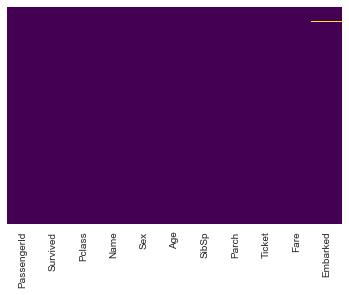

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,
            cbar=False,cmap='viridis')

In [18]:
train.dropna(inplace=True)

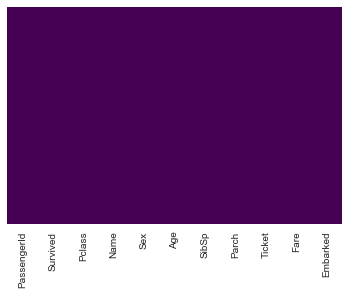

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,
            cbar=False,cmap='viridis')

I removed the Cabin column since too many values were missing. Then I fixed the remaining na values. 

**Second step: converting categorical variables into binary calsses (dummy variables)**

In [23]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


Create a sex dataset with dummies variables removing reduntant information(multicollinearity): remove first column

In [24]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

The same for embark column

In [25]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

Finally create the very final train dataset

In [26]:
train = pd.concat([train,sex,embark],axis=1)

**Removal of string (not usefull for data analysis) columns** 

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [28]:
train.drop(labels=['Name','Sex','Ticket','Embarked'],
           axis=1,inplace=True)

In [29]:
train.drop(labels='PassengerId',axis=1,inplace=True)

**Here the cleaned data** 

In [30]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


**Despite I like it a lot, dealing with (mainly) categorical variable, pairplot in this case is not particularly usefull.**

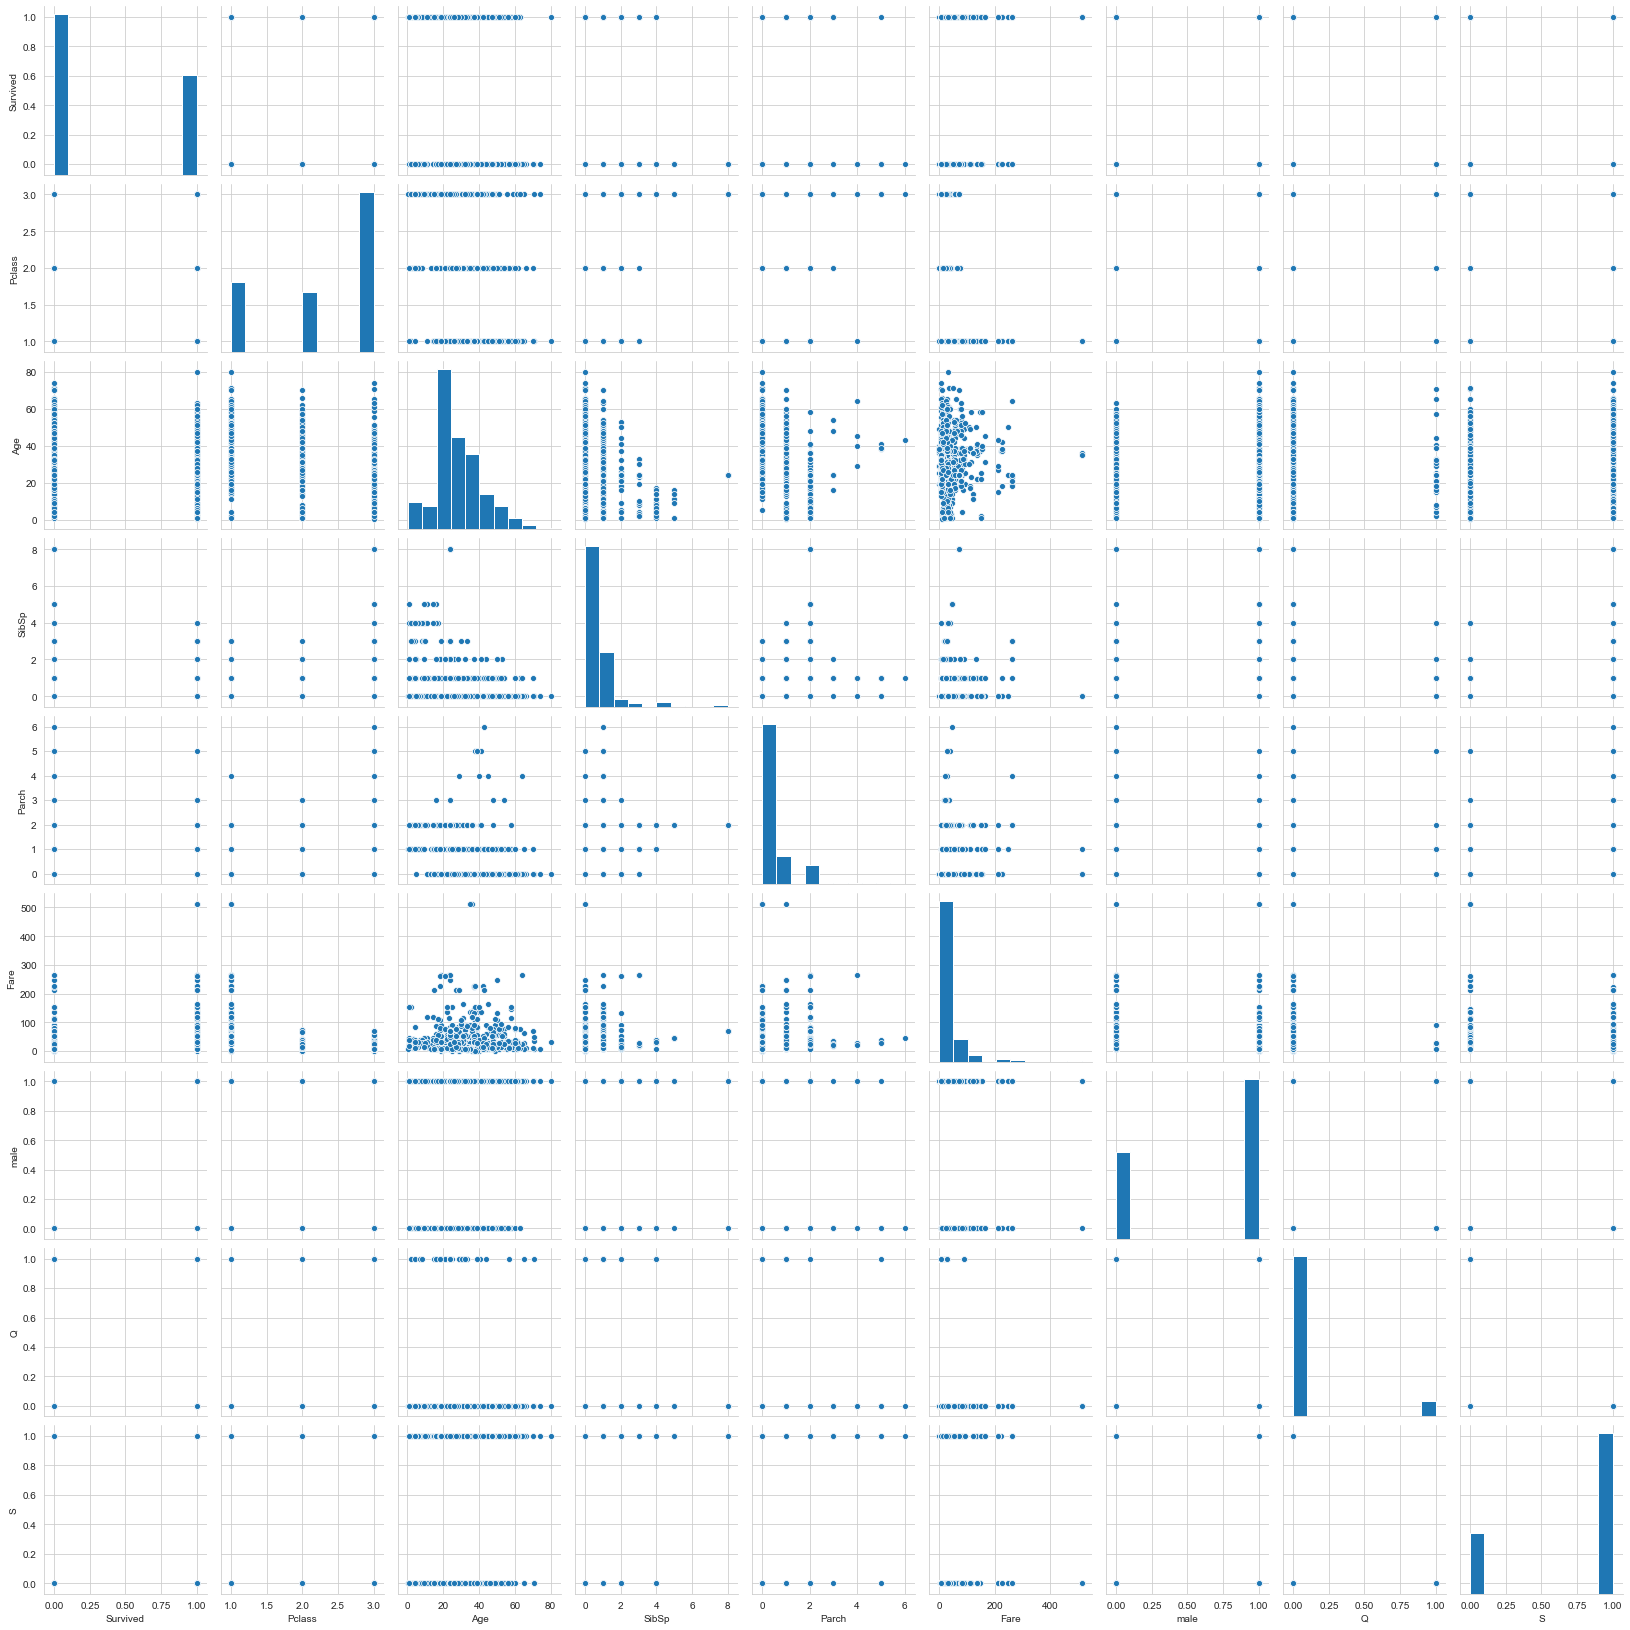

In [31]:
sns.pairplot(train)

## IMPORTANT: here I treat train dataframe as the whole dataset to split into train and test. Ti repeat the cleaning on the test.csv file and make the regression model on that couple

In [32]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test,y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression()

In [37]:
logmodel.fit(X_train,y_train)

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
prediction = logmodel.predict(X_test)

**Model results: confusion matrix and classification report.**

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [87]:
list(map(np.vectorize(int), confusion_matrix(y_test,prediction)/267*100))

[array([55,  5]), array([11, 27])]

In [101]:
print('Confusion Matrix (numeber of items)')
print(confusion_matrix(y_test,prediction))
print('\n')

print('Confusion Matrix (%)')

#compute the % matrix to display
total_items = 267
perc_matrix = confusion_matrix(y_test,prediction)/total_items*100

#convert data to int mapping int() function to the perc_matrix elements. 
#int() is vectorize in order to apply it on an ndarray.
l = list(map(np.vectorize(lambda x:np.around(x,1)), perc_matrix))
#l = list(map(np.vectorize(int), perc_matrix))


#create the 2D array
percent_conf_matrix = np.array(l)
print(percent_conf_matrix)

Confusion Matrix (numeber of items)
[[147  16]
 [ 30  74]]


Confusion Matrix (%)
[[55.1  6. ]
 [11.2 27.7]]


**The model coorectly detected 55 % of dead people and 27% of survived people for a total of correct predictions of 83.8%. It wrongly classified 17.2% of the predictions. Overall the model has an accuracy of about 84%.

## Feature Engeneering: extracting information from the string columns

In progress...